In [7]:
import sys
import os
import numpy as np
sys.path.insert(1, '../')


from src.padim_model import train as padim_train
from src.stn_model import train as stn_train
from src import utils


CLASS_NAMES = ['bottle', 'cable', 'capsule', 'carpet', 'grid',
               'hazelnut', 'leather', 'metal_nut', 'pill', 'screw',
               'tile', 'toothbrush', 'transistor', 'wood', 'zipper']
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
utils.set_seed()

In [3]:
stn_model,train_loader = stn_train.start(data_dir ='../data/mvtec_anomaly_detection',
                      batch_size = 32,learning_rate = 0.0005,num_epochs = 1)

['bottle', 'cable', 'capsule', 'carpet', 'grid', 'hazelnut', 'leather', 'metal_nut', 'pill', 'screw', 'tile', 'toothbrush', 'transistor', 'wood', 'zipper']
Training ..


/media/cristian/12FF1F6D0CD48422/Research/Fatima/env_fat/lib/python3.9/site-packages/torch/nn/functional.py:4298: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(
/media/cristian/12FF1F6D0CD48422/Research/Fatima/env_fat/lib/python3.9/site-packages/torch/nn/functional.py:4236: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(


Epoch 1/1, Loss: 2.4296943654643934e-05
Finished Training


torch.Size([32, 3, 224, 224])


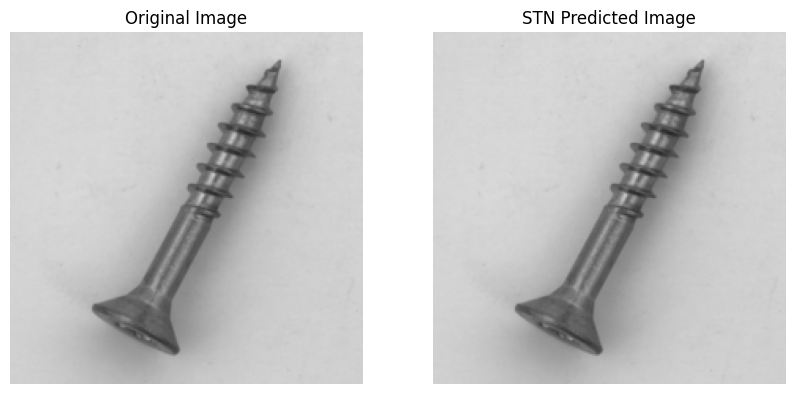

torch.Size([32, 3, 224, 224])
224


In [4]:
stn_train.visualize_stn(stn_model,train_loader)

In [5]:
stn_train.save_model(stn_model,model_name='../results/stn_model.pt')

In [6]:
stn_model_loaded = stn_train.load_model(stn_model,model_name='../results/stn_model.pt')

/media/cristian/12FF1F6D0CD48422/Research/Fatima/env_fat/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/media/cristian/12FF1F6D0CD48422/Research/Fatima/env_fat/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Wide_ResNet50_2_Weights.IMAGENET1K_V1`. You can also use `weights=Wide_ResNet50_2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/wide_resnet50_2-95faca4d.pth" to /home/cristian/.cache/torch/hub/checkpoints/wide_resnet50_2-95faca4d.pth
100%|██████████| 132M/132M [00:11<00:00, 12.5MB/s] 
| feature extraction | train | bottle |:   0%|          | 0/7 [00

image ROCAUC: 0.998
pixel ROCAUC: 0.985


| feature extraction | train | cable |:   0%|          | 0/7 [00:00<?, ?it/s]/media/cristian/12FF1F6D0CD48422/Research/Fatima/env_fat/lib/python3.9/site-packages/torch/nn/functional.py:4298: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(
/media/cristian/12FF1F6D0CD48422/Research/Fatima/env_fat/lib/python3.9/site-packages/torch/nn/functional.py:4236: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(
| feature extraction | train | cable |: 100%|██████████| 7/7 [00:13<00:00,  1.89s/it]


KeyboardInterrupt: 

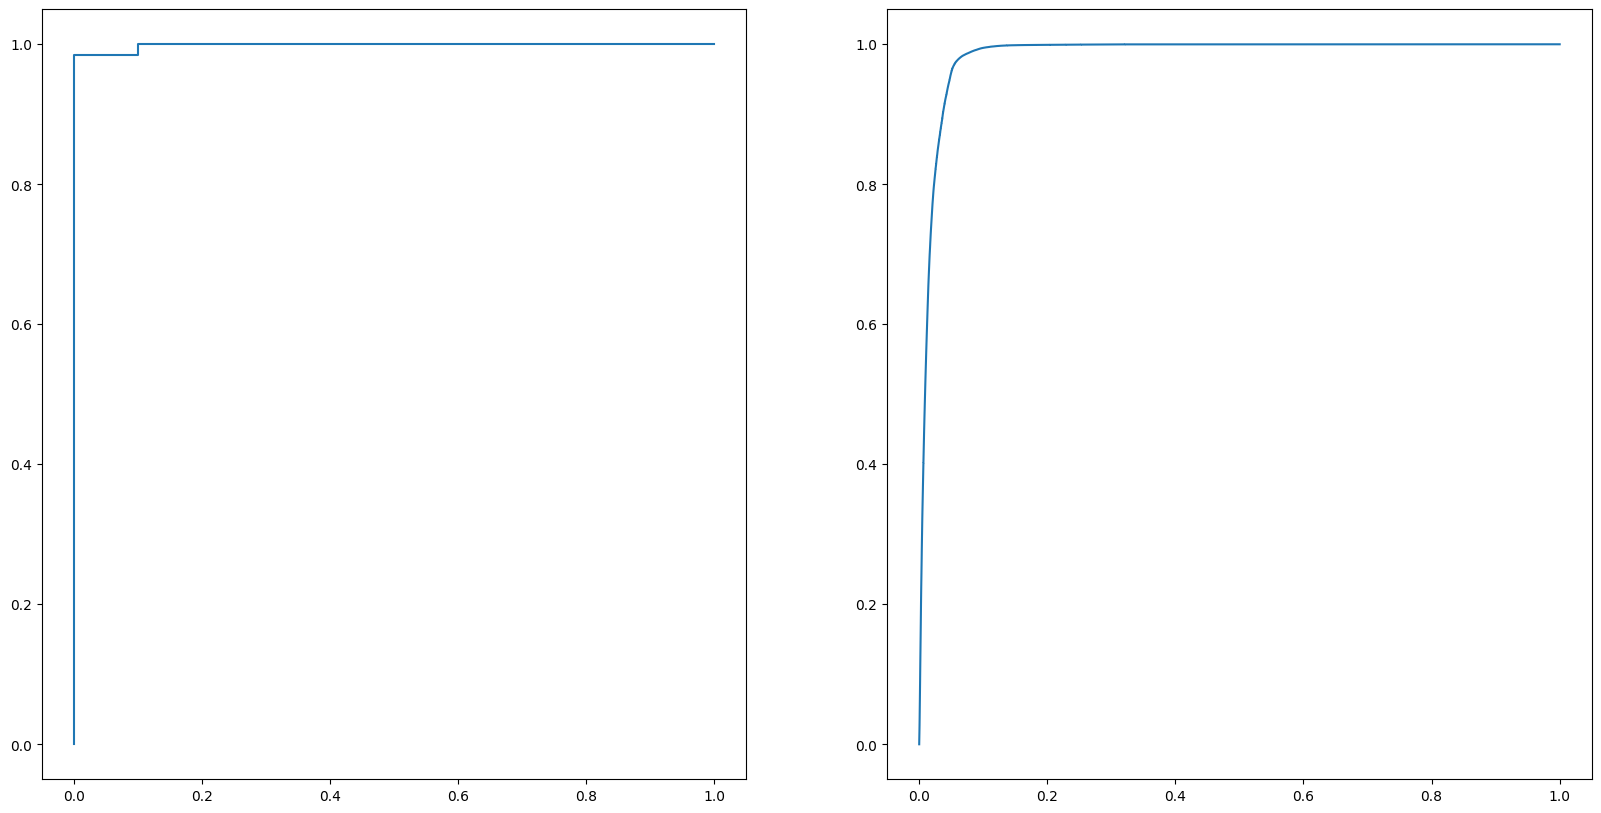

In [9]:
fig_pixel_rocauc,fig_img_rocauc,total_roc_auc,total_pixel_roc_auc,fig = padim_train.start(CLASS_NAMES,stn_model_loaded,data_path = '../data/mvtec_anomaly_detection',
                  arch = 'wide_resnet50_2',path_results='../results/mvtec_result')

In [10]:
print('Average Image ROCAUC: %.3f' % np.mean(total_roc_auc))
fig_img_rocauc.title.set_text('Average image ROCAUC: %.3f' % np.mean(total_roc_auc))
fig_img_rocauc.legend(loc="lower right")

NameError: name 'total_roc_auc' is not defined

In [20]:

print('Average pixel ROCUAC: %.3f' % np.mean(total_pixel_roc_auc))
fig_pixel_rocauc.title.set_text('Average pixel ROCAUC: %.3f' % np.mean(total_pixel_roc_auc))
fig_pixel_rocauc.legend(loc="lower right")


Average pixel ROCUAC: 0.977


In [21]:

fig.tight_layout()
fig.savefig(os.path.join('./mvtec_result', 'roc_curve_wide_resnet.png'), dpi=100)
